# Data Exploration,Visualization, Analysis, Reporting

**Dataset: Data Visualization of American Community Survey Dataset**

The dataset can be found on this link, https://docs.google.com/spreadsheets/d/1vfRviO-nr1HFTfAEhtp2rK8SUfCqULA4sANQNR30g3M/edit?usp=sharing.
The dataset has 4, 999 observations and 14 columns. 

## Data Visualization

Data can be visualized in different methods: line, scatter, bar, histogram, pie

In [105]:

# Importing most common and necessary packages

import numpy as np
import pandas as pd
import re
from scipy import stats
import math
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as snb
snb.set()

## Loading the Data

In [106]:
## Reading data or loading data
df = pd.read_csv('./data/American community survey.csv')

### Checking the shape of the data

In [107]:
# The data has 4999 rows and 14 columns
df.shape

(4999, 14)

### Getting Column names

In [108]:
# Getting the columns, the column name does not seem in Python or Pandas name convention, it needs renaming
df.columns

Index(['Age', 'Work class', 'Education', 'Level of education',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Work hours per week', 'Native country',
       'Annual income'],
      dtype='object')

In [109]:
number_of_columns = len(df.columns)
print(number_of_columns)

14


### Rename columns

In [110]:
df.columns = ['age', 'work_class', 'education', 'level_of_education',
 'marital_status', 'occupation', 'relationship', 'race', 'sex',
 'capital_gain', 'capital_loss', 'work_hours_per_week', 'native_country',
 'annual_income']


### Checking the first few records

In [111]:
# head method gives five rows by default without any argument
df.head(10)

,age,work_class,education,level_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,annual_income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,High school graduation,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married civilian spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Unincorporated self employment,High school graduation,9,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Checking the last few records

In [112]:
# the tail method give the last five rows of the dataset
df.tail()

,age,work_class,education,level_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,annual_income
4994,39,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,60,United-States,<=50K
4995,43,Private,5th-6th,3,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Mexico,<=50K
4996,31,Private,High school graduation,9,Married civilian spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4997,47,Incorporated self employment,High school graduation,9,Married civilian spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
4998,26,Private,High school graduation,9,Never-married,Administrative / clerical,Not-in-family,White,Male,0,0,60,United-States,<=50K


### Getting information about the data

In [113]:
# info method provides information about the data, the count of non null for all the colulmns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4999 non-null   int64 
 1   work_class           4999 non-null   object
 2   education            4999 non-null   object
 3   level_of_education   4999 non-null   int64 
 4   marital_status       4999 non-null   object
 5   occupation           4999 non-null   object
 6   relationship         4999 non-null   object
 7   race                 4999 non-null   object
 8   sex                  4999 non-null   object
 9   capital_gain         4999 non-null   int64 
 10  capital_loss         4999 non-null   int64 
 11  work_hours_per_week  4999 non-null   int64 
 12  native_country       4999 non-null   object
 13  annual_income        4999 non-null   object
dtypes: int64(5), object(9)
memory usage: 546.9+ KB


In [114]:
# info method provides information about the data, the count of non null for all the colulmns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  4999 non-null   int64 
 1   work_class           4999 non-null   object
 2   education            4999 non-null   object
 3   level_of_education   4999 non-null   int64 
 4   marital_status       4999 non-null   object
 5   occupation           4999 non-null   object
 6   relationship         4999 non-null   object
 7   race                 4999 non-null   object
 8   sex                  4999 non-null   object
 9   capital_gain         4999 non-null   int64 
 10  capital_loss         4999 non-null   int64 
 11  work_hours_per_week  4999 non-null   int64 
 12  native_country       4999 non-null   object
 13  annual_income        4999 non-null   object
dtypes: int64(5), object(9)
memory usage: 546.9+ KB


In [115]:
# counts all the non missing values of the colulmn, it is similar to info method
df.count()

age                    4999
work_class             4999
education              4999
level_of_education     4999
marital_status         4999
occupation             4999
relationship           4999
race                   4999
sex                    4999
capital_gain           4999
capital_loss           4999
work_hours_per_week    4999
native_country         4999
annual_income          4999
dtype: int64

In [116]:
# The following method also show the total number of missing values in each row.
# The result shows that there is no missing values in the dataset
# Therefore we do not follow any approach to populate missing values
df.isnull().sum()

age                    0
work_class             0
education              0
level_of_education     0
marital_status         0
occupation             0
relationship           0
race                   0
sex                    0
capital_gain           0
capital_loss           0
work_hours_per_week    0
native_country         0
annual_income          0
dtype: int64

## Descriptive Statistics

In [117]:
# provides statistical values of the quantitative values

df.describe()

,age,level_of_education,capital_gain,capital_loss,work_hours_per_week
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,38.596319,10.079616,1033.846969,93.715543,40.516103
std,13.593285,2.535159,7052.492345,410.840375,12.108672
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2547.000000,99.000000


In [118]:
# provides statistical values of both the quantitative values and categorial values

df.describe(include='all')

,age,work_class,education,level_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,annual_income
count,4999.000000,4999,4999,4999.000000,4999,4999,4999,4999,4999,4999.000000,4999.000000,4999.000000,4999,4999
unique,NaN,8,16,NaN,7,15,6,5,2,NaN,NaN,NaN,40,2
top,NaN,Private,High school graduation,NaN,Married civilian spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,3435,1617,NaN,2270,624,2001,4251,3371,NaN,NaN,NaN,4464,3778
mean,38.596319,NaN,NaN,10.079616,NaN,NaN,NaN,NaN,NaN,1033.846969,93.715543,40.516103,NaN,NaN
std,13.593285,NaN,NaN,2.535159,NaN,NaN,NaN,NaN,NaN,7052.492345,410.840375,12.108672,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [202]:
numeric_columns = ['age', 'capital_gain', 'capital_loss', 'work_hours_per_week']


In [192]:
df[['education', 'annual_income']].value_counts()

education               annual_income
High school graduation  <=50K            1322
Some-college            <=50K             934
Bachelors               <=50K             487
                        >50K              345
High school graduation  >50K              295
Some-college            >50K              190
11th                    <=50K             186
Vocational association  <=50K             162
Masters                 >50K              135
10th                    <=50K             133
Masters                 <=50K             117
Academic association    <=50K             113
7th-8th                 <=50K              92
9th                     <=50K              74
Professional school     >50K               64
Vocational association  >50K               56
12th                    <=50K              52
Academic association    >50K               51
Doctorate               >50K               42
5th-6th                 <=50K              40
Professional school     <=50K             

In [200]:
# pd.crosstab(df['education'], df['annual_income'])
pd.crosstab(df['annual_income'], 'Count')

col_0,Count
annual_income,
<=50K,3778
>50K,1221


In [201]:
df[df['annual_income'] == '>50K']

,age,work_class,education,level_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,annual_income,work_hours_per_week_group
7,52,Unincorporated self employment,High school graduation,9,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,45,United-States,>50K,"(40, 50]"
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,"(40, 50]"
9,42,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,5178,0,40,United-States,>50K,"(30, 40]"
10,37,Private,Some-college,10,Married civilian spouse,Executive / managerial,Husband,Black,Male,0,0,80,United-States,>50K,"(70, 80]"
11,30,State-gov,Bachelors,13,Married civilian spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,45,Private,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,8614,0,48,United-States,>50K,"(40, 50]"
4983,34,Private,Professional school,15,Married civilian spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K,"(40, 50]"
4988,43,Incorporated self employment,Some-college,10,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,50,United-States,>50K,"(40, 50]"
4996,31,Private,High school graduation,9,Married civilian spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K,"(30, 40]"


In [100]:
limits=[15, 20, 25,30, 35, 40, 45, 50, 55, 60, 70, 90]
df['age_group']=pd.cut(df['age'], bins=limits)
df_age_group = df.groupby('age_group', observed=False).size().reset_index(name='Count').sort_values(by='Count')

4999


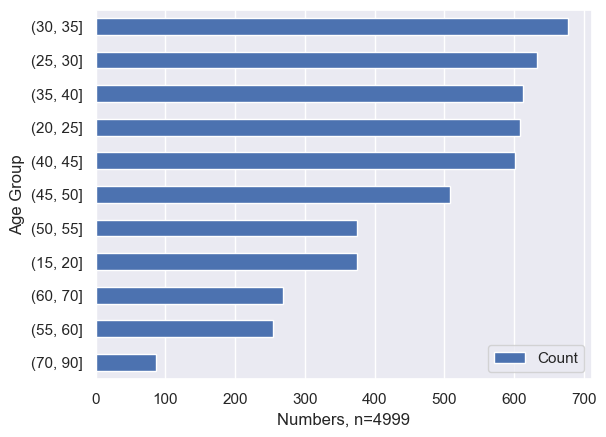

In [101]:
n = df_age_group['Count'].sum()
print(n)
x = list(df_age_group['age_group'])
y = list(df_age_group['Count'])
df_age_group.plot.barh(x = 'age_group', y ='Count')

plt.xlabel(f'Numbers, n={n}')
plt.ylabel('Age Group')
plt.grid(axis = 'y')

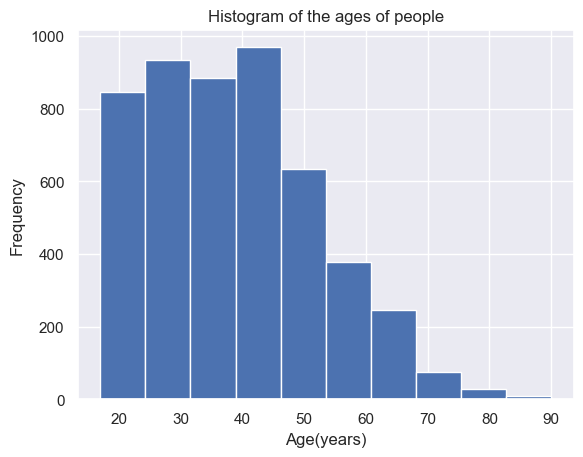

In [81]:
df_ages = df['age']
plt.hist(df_ages, bins = 10)
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.title('Histogram of the ages of people')
plt.show()

In [82]:
# function to create a line in a histogram 
def fit_to_normal_dist (data):
   #  Fit a normal distribution to the data and plot the PDF (probability density function)
    mu, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    return x, p

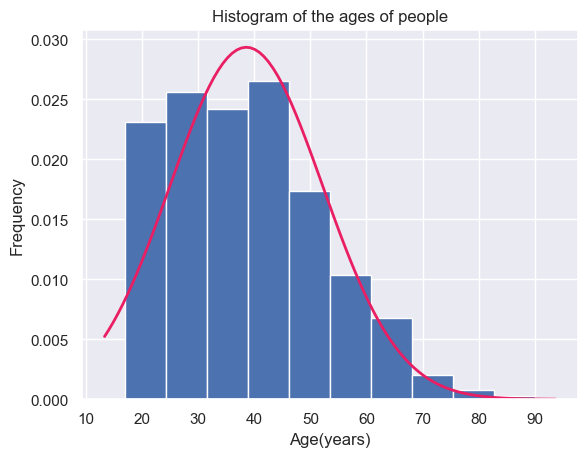

In [84]:
df_ages = df['age']
plt.hist(df_ages, density = True, bins = 10)
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.title('Histogram of the ages of people')
x, p = fit_to_normal_dist (df_ages)
plt.plot(x, p, '#e91e63', linewidth=2)
plt.show()

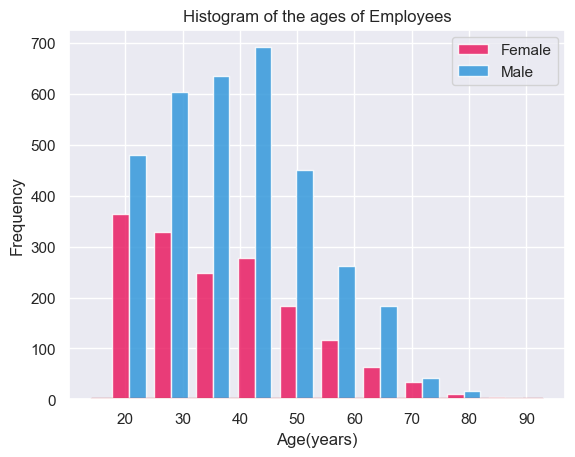

In [86]:
female = df[df['sex'] == 'Female']['age']
male = df[df['sex'] == 'Male']['age']
plt.hist([female,male], bins=10, alpha = 0.85, label = ['Female', 'Male'], color =['#e91e63', '#3498db'])
# plt.hist(male, bins=25, alpha=0.45, color='blue')
plt.xlabel('Age(years)')
plt.ylabel('Frequency')
plt.title('Histogram of the ages of people')
plt.legend(['Female','Male'])

# Plot the normal distribution line
x,p = fit_to_normal_dist(male)
plt.plot(x, p, 'r', linewidth=2)
plt.show()

## Visualization using Graphs

### Gender

[1628, 3371] ['Female', 'Male']


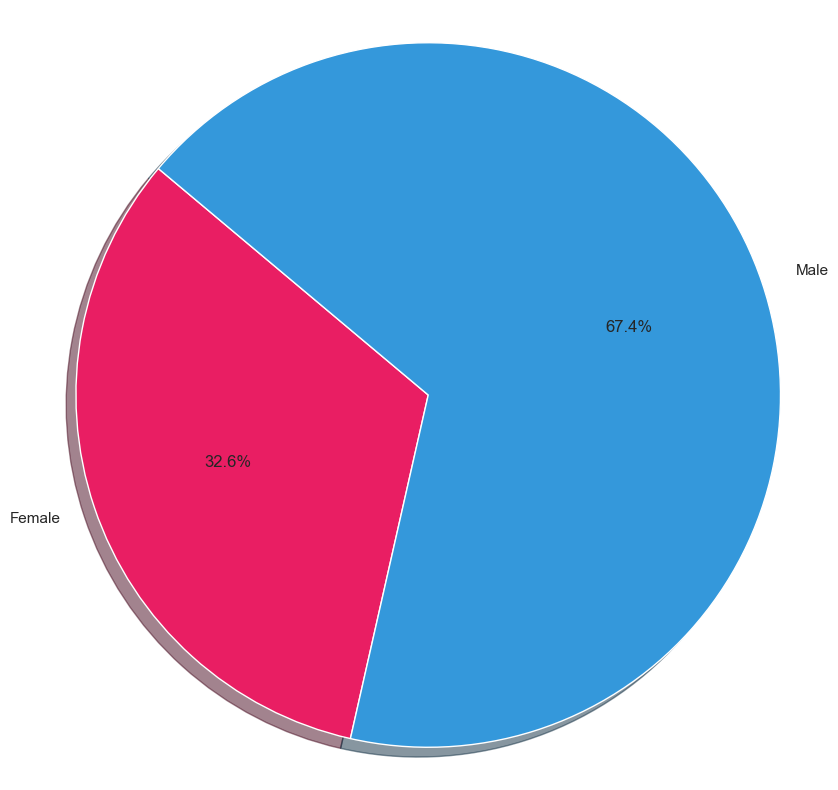

In [168]:
df_gender_distribution = df.groupby('sex').size()
labels = list(df_gender_distribution.index)
sizes = list(df_gender_distribution.values)
print(sizes, labels)

plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=140, colors =  ['#e91e63', '#3498db'])
plt.axis('equal')
plt.show()

In [139]:
gender = df['sex'].value_counts().sort_values()
x_g = gender.index
y_g = gender.values

In [140]:
gender

sex
Female    1628
Male      3371
Name: count, dtype: int64

In [141]:
women_pec = (1628 / df.shape[0]) * 100
women_pec

32.56651330266053

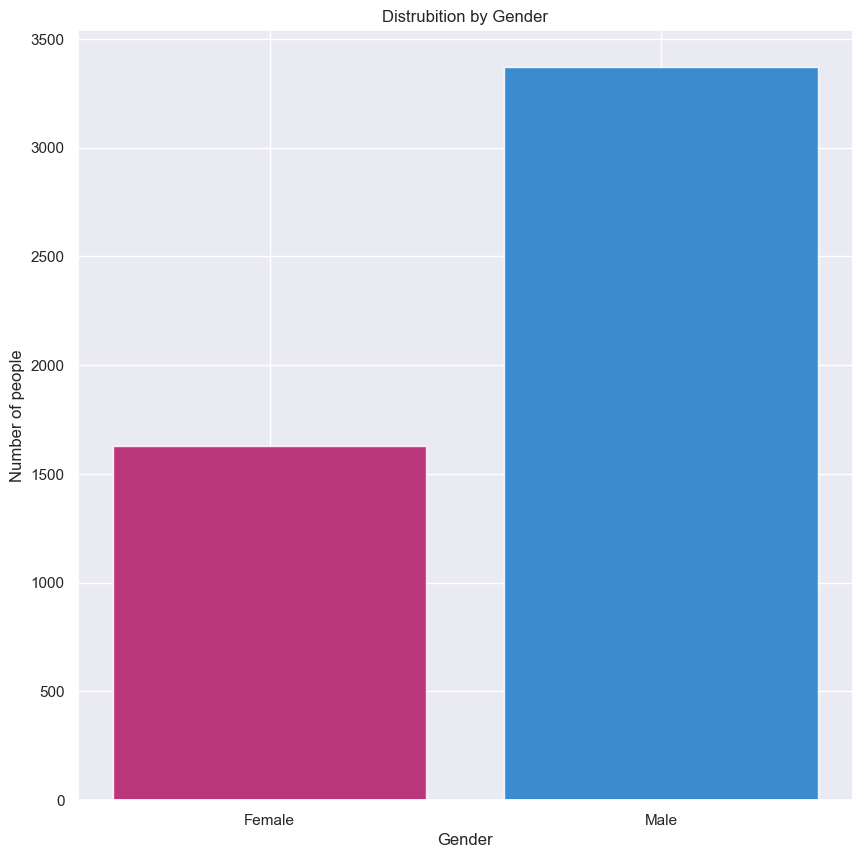

In [159]:
plt.bar(x_g, y_g)
plt.title('Distrubition by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of people')
# plt.legend(indexes)
plt.bar(x_g, y_g,color= ['#e91e63', '#3498db'], alpha = 0.7)
plt.savefig('./gender_bargraph.png')
plt.show()

In [147]:
a_income = df['annual_income'].value_counts()
print(a_income)
print((1221 / df.shape[0]) * 100)
a_income = a_income.sort_values()

annual_income
<=50K    3778
>50K     1221
Name: count, dtype: int64
24.424884976995397


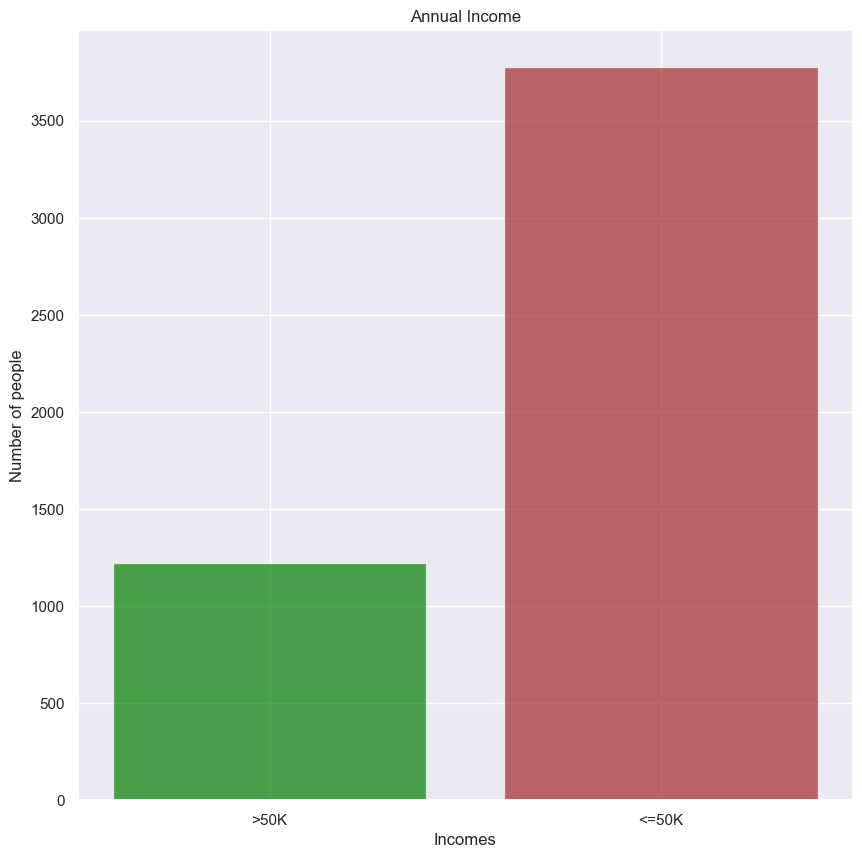

In [154]:
a_income = df['annual_income'].value_counts().sort_values()
x_ai = a_income.index
y_ai = a_income.values

plt.title('Annual Income')
plt.xlabel('Incomes')
plt.ylabel('Number of people')
# plt.legend(indexes)
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.bar(x_ai, y_ai,alpha=0.7, color=['green', 'brown'])
plt.savefig('./annual_income.png')
plt.show()


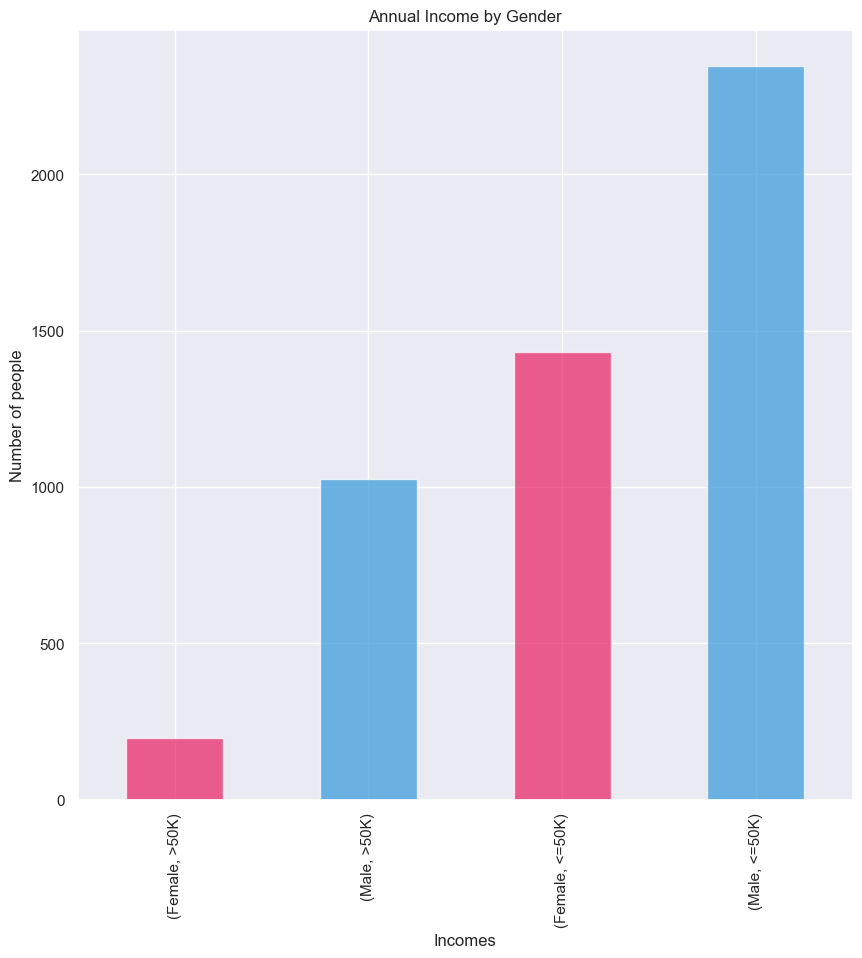

In [157]:
df[['sex','annual_income']].value_counts().sort_values().plot(kind='bar', color=['#e91e63', '#3498db'], alpha=0.7)
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title('Annual Income by Gender')
plt.xlabel('Incomes')
plt.ylabel('Number of people')
plt.savefig('./anual_income_by_gender.png')
plt.show()

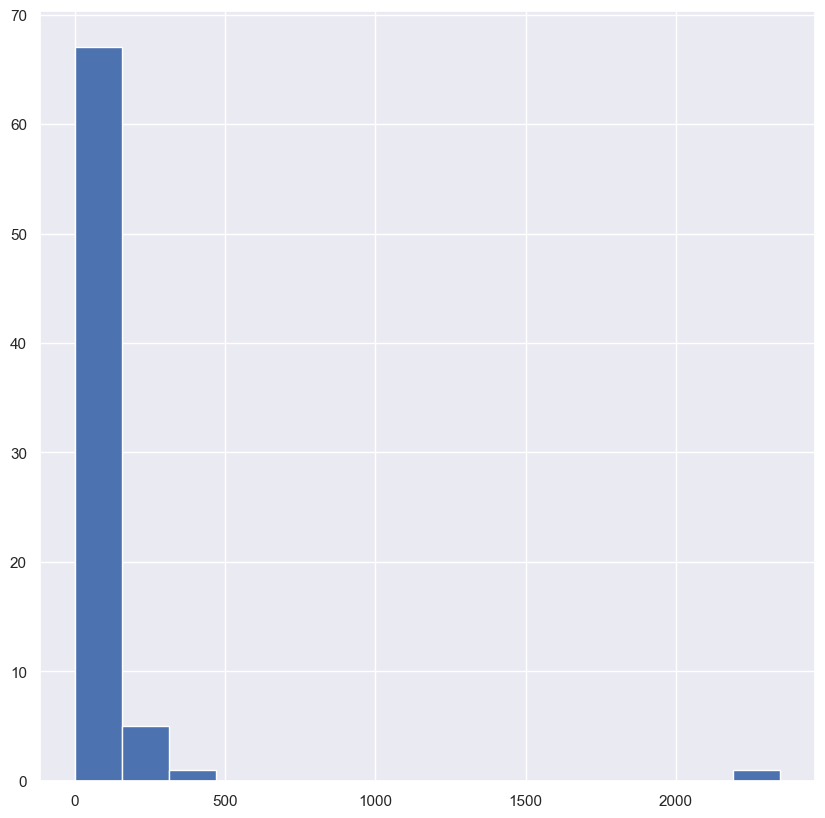

In [171]:
df_whw = df['work_hours_per_week'].value_counts().sort_values()
plt.hist(df_whw, bins = 15)
# x_whw = list(df_whw.index)
# y_whw = list(df_whw.values)
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
# plt.title('Work Hours Per Week')
# plt.xlabel('Work Hours')
# plt.ylabel('Number of people')
# plt.bar(x_whw, y_whw, alpha=0.7)
# plt.savefig('./work_hours_per_week.png')
plt.show()

In [173]:
# df.groupby('Native country').count()
df[df['work_hours_per_week'] > 40]

,age,work_class,education,level_of_education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,work_hours_per_week,native_country,annual_income
7,52,Unincorporated self employment,High school graduation,9,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
10,37,Private,Some-college,10,Married civilian spouse,Executive / managerial,Husband,Black,Male,0,0,80,United-States,>50K
13,32,Private,Academic association,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
15,34,Private,7th-8th,4,Married civilian spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,43,Incorporated self employment,Some-college,10,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,50,United-States,>50K
4989,52,Private,Vocational association,11,Separated,Executive / managerial,Unmarried,Black,Female,0,0,60,United-States,<=50K
4990,33,Unincorporated self employment,Academic association,12,Divorced,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K
4994,39,Private,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,60,United-States,<=50K


In [174]:
df['work_hours_per_week'].describe()

count    4999.000000
mean       40.516103
std        12.108672
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: work_hours_per_week, dtype: float64

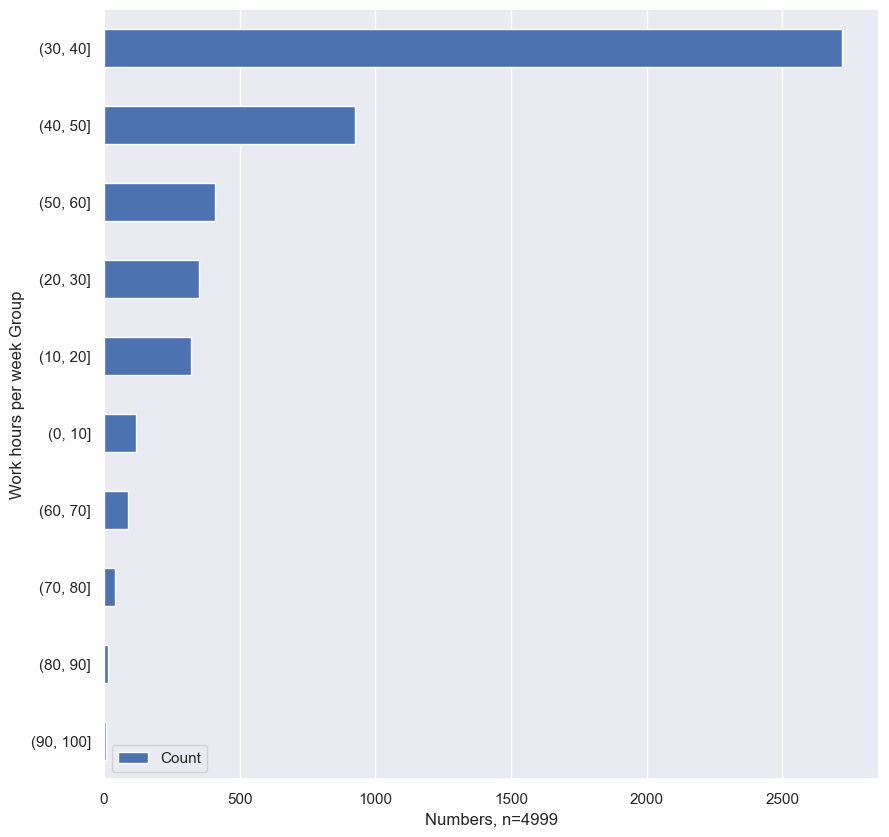

In [187]:
# df.groupby('work_hours_per_week')
limits=[0, 10, 20,30, 40, 50, 60, 70, 80, 90, 100]
df['work_hours_per_week_group']=pd.cut(df['work_hours_per_week'], bins=limits)
df_work_hours_per_week_group = df.groupby('work_hours_per_week_group', observed=False).size().reset_index(name='Count').sort_values(by='Count')

 
n = df_work_hours_per_week_group['Count'].sum()
x = list(df_work_hours_per_week_group['work_hours_per_week_group'])
y = list(df_work_hours_per_week_group['Count'])
df_work_hours_per_week_group.plot.barh(x = 'work_hours_per_week_group', y ='Count')

plt.xlabel(f'Numbers, n={n}')
plt.ylabel('Work hours per week Group')
plt.grid(axis = 'y')


In [477]:
work_class = df['Work class'].value_counts()

In [478]:
# a_income = df['Annual income'].value_counts()
# x_wc = work_class.index
# y_wc = work_class.values
# plt.rcParams["figure.figsize"] = (25,10)
# plt.title('Work Class')
# plt.xlabel('Class')
# plt.ylabel('Number of people')
# # plt.legend(indexes)
# plt.bar(x_wc, y_wc)
# plt.savefig('./graphs/work_class.png')
# plt.show()

In [479]:
# df.groupby('Native country').count()
df[df['Work hours per week'] > 40].shape

(1490, 14)

In [480]:
df.groupby('Native country').count().iloc[:,1].sort_values()

Native country
Scotland                         1
Hong                             1
Yugoslavia                       2
Thailand                         2
Laos                             2
Peru                             3
Outlying-US(Guam-USVI-etc)       3
Honduras                         3
France                           3
Trinadad&Tobago                  4
Ireland                          4
Ecuador                          4
Cambodia                         4
Nicaragua                        5
Columbia                         5
Greece                           6
Haiti                            6
Portugal                         7
Poland                           9
Japan                            9
South                            9
Taiwan                          10
Guatemala                       10
Vietnam                         10
Iran                            11
Italy                           12
India                           12
Dominican-Republic              13
Cuba 

In [481]:
df.columns

Index(['Age', 'Work class', 'Education', 'Level of education',
       'Marital status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital gain', 'Capital loss', 'Work hours per week', 'Native country',
       'Annual income'],
      dtype='object')

In [482]:
df['Native country'].value_counts()

United-States                 4464
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
Puerto-Rico                     16
El-Salvador                     16
England                         16
Jamaica                         15
China                           15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Vietnam                         10
Guatemala                       10
Taiwan                          10
Poland                           9
Japan                            9
South                            9
Portugal                         7
Haiti                            6
Greece                           6
Nicaragua                        5
Columbia                         5
Ireland                          4
Ecuador             

In [483]:
df.groupby('Education').count()

,Age,Work class,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
Education,,,,,,,,,,,,,
10th,145,145,145,145,145,145,145,145,145,145,145,145,145
11th,199,199,199,199,199,199,199,199,199,199,199,199,199
12th,55,55,55,55,55,55,55,55,55,55,55,55,55
1st-4th,22,22,22,22,22,22,22,22,22,22,22,22,22
5th-6th,43,43,43,43,43,43,43,43,43,43,43,43,43
7th-8th,99,99,99,99,99,99,99,99,99,99,99,99,99
9th,78,78,78,78,78,78,78,78,78,78,78,78,78
Academic association,164,164,164,164,164,164,164,164,164,164,164,164,164
Bachelors,832,832,832,832,832,832,832,832,832,832,832,832,832


In [484]:
df['Marital status']

0                 Never-married
1       Married civilian spouse
2                      Divorced
3       Married civilian spouse
4       Married civilian spouse
                 ...           
4994    Married civilian spouse
4995              Never-married
4996    Married civilian spouse
4997    Married civilian spouse
4998              Never-married
Name: Marital status, Length: 4999, dtype: object

In [485]:
df['Level of education'].compare(df['Education'], align_axis=0)

0     self                         13
      other                 Bachelors
1     self                         13
      other                 Bachelors
2     self                          9
                        ...          
4996  other    High school graduation
4997  self                          9
      other    High school graduation
4998  self                          9
      other    High school graduation
Length: 9998, dtype: object

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  4999 non-null   int64 
 1   Work class           4999 non-null   object
 2   Education            4999 non-null   object
 3   Level of education   4999 non-null   int64 
 4   Marital status       4999 non-null   object
 5   Occupation           4999 non-null   object
 6   Relationship         4999 non-null   object
 7   Race                 4999 non-null   object
 8   Sex                  4999 non-null   object
 9   Capital gain         4999 non-null   int64 
 10  Capital loss         4999 non-null   int64 
 11  Work hours per week  4999 non-null   int64 
 12  Native country       4999 non-null   object
 13  Annual income        4999 non-null   object
dtypes: int64(5), object(9)
memory usage: 546.9+ KB


In [487]:
df.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,High school graduation,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married civilian spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [488]:
df_edu_deg = df[(df['Education'] == 'Bachelors') | (df['Education'] == 'Masters') |  (df['Education'] == 'Doctorate')]
df_edu_deg.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [489]:
df_edu_deg['Education'].value_counts()

Bachelors    832
Masters      252
Doctorate     56
Name: Education, dtype: int64

In [490]:
values = df_edu_deg['Education'].value_counts().values
print(list(values))

[832, 252, 56]


In [509]:
np.array([832, 252, 56]) * (100/df.shape[0])

array([16.64332867,  5.0410082 ,  1.12022404])

In [491]:
indexes = df_edu_deg['Education'].value_counts().index
print(list(indexes))

['Bachelors', 'Masters', 'Doctorate']


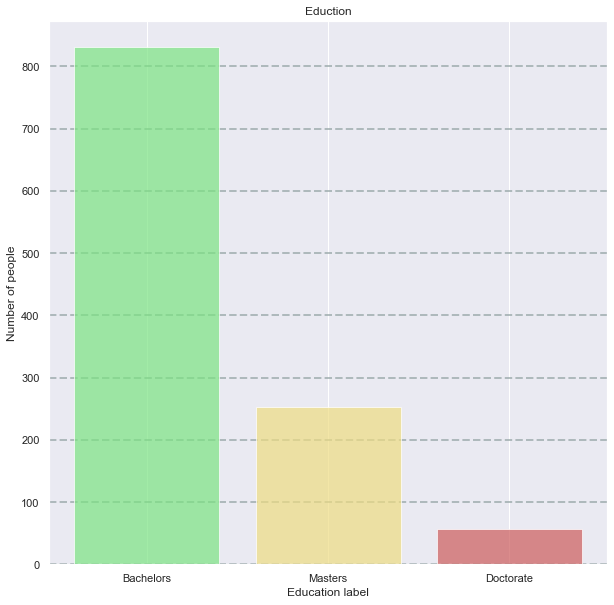

In [492]:
plt.title('Eduction')
plt.xlabel('Education label')
plt.ylabel('Number of people')
# plt.legend(indexes)
plt.bar(indexes, values,color=['#7be382','#eedc82', '#cd5c5c'], alpha = 0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.savefig('./graphs/education.png')
plt.show()

In [493]:
df['Sex'].value_counts()

Male      3371
Female    1628
Name: Sex, dtype: int64

In [494]:
# def draw_bar_graph (dct):
#     plt.title(dct['title'])
#     plt.xlabel(dct['xlabel'])
#     plt.ylabel(d['ylabel'])
#     plt.bar(indexes, values,color=dct['colors'])

# dct = {
#     title:'Title',
#     xlabel:'xlabel',
#     ylabel:'ylabel',
#     color:['r']
#     x:x,
#     y:y
# }

In [495]:
df_edu_deg.head()

,Age,Work class,Education,Level of education,Marital status,Occupation,Relationship,Race,Sex,Capital gain,Capital loss,Work hours per week,Native country,Annual income
0,39,State-gov,Bachelors,13,Never-married,Administrative / clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Unincorporated self employment,Bachelors,13,Married civilian spouse,Executive / managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,Bachelors,13,Married civilian spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married civilian spouse,Executive / managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


In [496]:
df_edu_deg_m = df_edu_deg[df_edu_deg['Sex'] == 'Male']
df_edu_deg_f = df_edu_deg[df_edu_deg['Sex'] == 'Female']

print(df_edu_deg_m.shape)
print(df_edu_deg_f.shape)


(826, 14)
(314, 14)


Index(['Bachelors', 'Masters', 'Doctorate'], dtype='object')


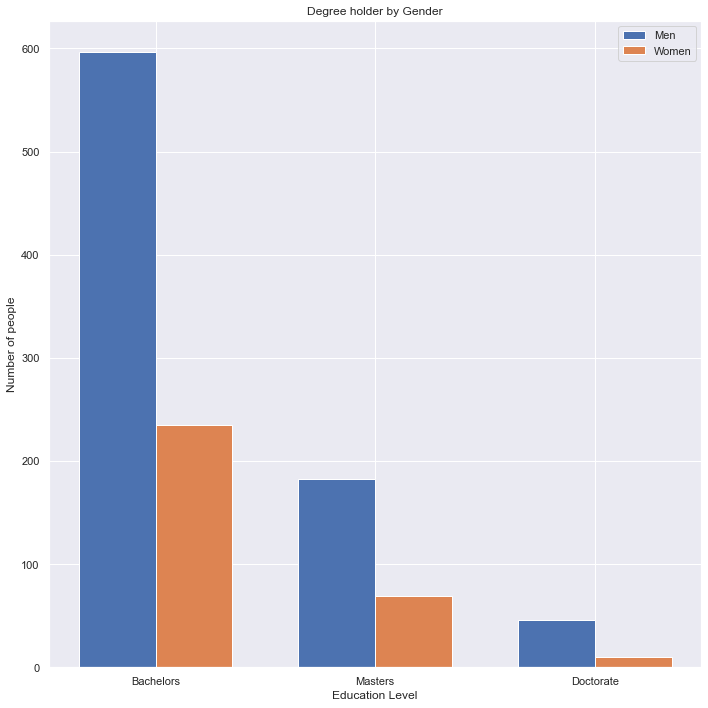

In [497]:
deg_males = df_edu_deg_m['Education'].value_counts().values
deg_females = df_edu_deg_f['Education'].value_counts().values
print(df_edu_deg_f['Education'].value_counts().index)

labels = list(df_edu_deg_f['Education'].value_counts().index)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, deg_males, width, label='Men')
rects2 = ax.bar(x + width/2, deg_females, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_xlabel('Education Level')
ax.set_title('Degree holder by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.savefig('./graphs/degree_holder_gender.png')
plt.show()

 ### Conclusions
The dataset has 1628 women and 3371 men. The proportion of women in the data set is 32%.  According to this dataset, 24.4% of the people get more than 50K annually. Most of the people work 40 hours per week. 
In terms of education,  education level is as follows: 16.7% Bachelors, 5.04% Masters, and 1.12% Doctorate . The number of women that have degrees are much lower than the number of mens. The graphical representation of this result has been attached as an image. 
